In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=896ce3b6555721ab2b6f7a938ef1e61b


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=896ce3b6555721ab2b6f7a938ef1e61b&q=Boston


In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
coordinates

[(78.43549612420478, 16.55892216170659),
 (-30.51360667733656, -90.1613553075245),
 (14.964753702097426, 144.6288351528001),
 (-4.361396101385964, 69.15085419732992),
 (-54.49882432083363, 33.48433325045926),
 (-82.605545355942, 129.04063605579495),
 (-33.295008551044546, -167.95220396596054),
 (68.55193893887767, -166.71733904699843),
 (-37.92438192916896, -19.086749985743523),
 (-89.70983481524772, 16.79328943339604),
 (40.38162628293733, 114.02904229271019),
 (10.779081121537601, 177.65676235454725),
 (-89.54455711116712, 94.48997971523852),
 (89.46531745027133, 119.22887622510012),
 (-19.060723939949398, -113.3888220699598),
 (80.03027786941072, 128.3133271570003),
 (-23.475209651065185, -4.6367410026550715),
 (-1.9948289879432224, -144.55377372709307),
 (39.31455006713469, 45.48309800658498),
 (-37.359405757757756, -53.01782331942351),
 (-38.55968985576942, 112.62629531957464),
 (-44.248074640741734, -148.26708649532137),
 (29.58923142711201, -42.31098100996104),
 (34.666212021108

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chapais
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 3 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 4 of Set 1 | beloha
City not found. Skipping...
Processing Record 5 of Set 1 | klaksvik
City not found. Skipping...
Processing Record 6 of Set 1 | omsukchan
City not found. Skipping...
Processing Record 7 of Set 1 | leningradskiy
City not found. Skipping...
Processing Record 8 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 9 of Set 1 | geraldton
City not found. Skipping...
Processing Record 10 of Set 1 | nadym
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 12 of Set 1 | sitka
City not found. Skipping...
Processing Record 13 of Set 1 | oranjemund
City not found. Skipping...
Processing Record 14 of Set 1 | de

City not found. Skipping...
Processing Record 19 of Set 3 | srednekolymsk
City not found. Skipping...
Processing Record 20 of Set 3 | saint anthony
City not found. Skipping...
Processing Record 21 of Set 3 | narsaq
City not found. Skipping...
Processing Record 22 of Set 3 | tomatlan
City not found. Skipping...
Processing Record 23 of Set 3 | eirunepe
City not found. Skipping...
Processing Record 24 of Set 3 | bo
City not found. Skipping...
Processing Record 25 of Set 3 | kindu
City not found. Skipping...
Processing Record 26 of Set 3 | san juan
City not found. Skipping...
Processing Record 27 of Set 3 | fort nelson
City not found. Skipping...
Processing Record 28 of Set 3 | palembang
City not found. Skipping...
Processing Record 29 of Set 3 | conceicao do araguaia
City not found. Skipping...
Processing Record 30 of Set 3 | khani
City not found. Skipping...
Processing Record 31 of Set 3 | new norfolk
City not found. Skipping...
Processing Record 32 of Set 3 | tautira
City not found. Ski

City not found. Skipping...
Processing Record 40 of Set 5 | lardos
City not found. Skipping...
Processing Record 41 of Set 5 | portland
City not found. Skipping...
Processing Record 42 of Set 5 | along
City not found. Skipping...
Processing Record 43 of Set 5 | san cristobal
City not found. Skipping...
Processing Record 44 of Set 5 | chibuto
City not found. Skipping...
Processing Record 45 of Set 5 | saint-philippe
City not found. Skipping...
Processing Record 46 of Set 5 | hualmay
City not found. Skipping...
Processing Record 47 of Set 5 | jumla
City not found. Skipping...
Processing Record 48 of Set 5 | mabaruma
City not found. Skipping...
Processing Record 49 of Set 5 | constitucion
City not found. Skipping...
Processing Record 50 of Set 5 | sao filipe
City not found. Skipping...
Processing Record 1 of Set 6 | rio gallegos
City not found. Skipping...
Processing Record 2 of Set 6 | iskele
City not found. Skipping...
Processing Record 3 of Set 6 | urumqi
City not found. Skipping...
Pr

City not found. Skipping...
Processing Record 9 of Set 8 | shubarshi
City not found. Skipping...
Processing Record 10 of Set 8 | westport
City not found. Skipping...
Processing Record 11 of Set 8 | clyde river
City not found. Skipping...
Processing Record 12 of Set 8 | faya
City not found. Skipping...
Processing Record 13 of Set 8 | alofi
City not found. Skipping...
Processing Record 14 of Set 8 | augustow
City not found. Skipping...
Processing Record 15 of Set 8 | iskateley
City not found. Skipping...
Processing Record 16 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 8 | sandnessjoen
City not found. Skipping...
Processing Record 18 of Set 8 | teacapan
City not found. Skipping...
Processing Record 19 of Set 8 | pombas
City not found. Skipping...
Processing Record 20 of Set 8 | iqaluit
City not found. Skipping...
Processing Record 21 of Set 8 | lolua
City not found. Skipping...
Processing Record 22 of Set 8 | teguldet
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 29 of Set 10 | rochelle
City not found. Skipping...
Processing Record 30 of Set 10 | paredon
City not found. Skipping...
Processing Record 31 of Set 10 | nantucket
City not found. Skipping...
Processing Record 32 of Set 10 | maykain
City not found. Skipping...
Processing Record 33 of Set 10 | tsihombe
City not found. Skipping...
Processing Record 34 of Set 10 | bousse
City not found. Skipping...
Processing Record 35 of Set 10 | coronini
City not found. Skipping...
Processing Record 36 of Set 10 | krasnoselkup
City not found. Skipping...
Processing Record 37 of Set 10 | anchorage
City not found. Skipping...
Processing Record 38 of Set 10 | ancud
City not found. Skipping...
Processing Record 39 of Set 10 | taybad
City not found. Skipping...
Processing Record 40 of Set 10 | zhuhai
City not found. Skipping...
Processing Record 41 of Set 10 | antofagasta
City not found. Skipping...
Processing Record 42 of Set 10 | astara
City not found. Skipping

City not found. Skipping...
Processing Record 48 of Set 12 | byron bay
City not found. Skipping...
Processing Record 49 of Set 12 | batagay
City not found. Skipping...
Processing Record 50 of Set 12 | mount isa
City not found. Skipping...
Processing Record 1 of Set 13 | myitkyina
City not found. Skipping...
Processing Record 2 of Set 13 | aden
City not found. Skipping...
Processing Record 3 of Set 13 | vila velha
City not found. Skipping...
Processing Record 4 of Set 13 | kailua
City not found. Skipping...
Processing Record 5 of Set 13 | atocha
City not found. Skipping...
Processing Record 6 of Set 13 | cap malheureux
City not found. Skipping...
Processing Record 7 of Set 13 | kawalu
City not found. Skipping...
Processing Record 8 of Set 13 | kariba
City not found. Skipping...
Processing Record 9 of Set 13 | partyzany
City not found. Skipping...
Processing Record 10 of Set 13 | yelniki
City not found. Skipping...
Processing Record 11 of Set 13 | boa vista
City not found. Skipping...
Pr

In [12]:
len(city_data)


569

In [1]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [14]:
# formatting column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2020-11-28 05:22:56,78.22,15.64,28.40,79,90,40.26
1,Lebu,CL,2020-11-28 05:22:56,-37.62,-73.65,51.75,90,100,3.47
2,Airai,TL,2020-11-28 05:22:56,-8.93,125.41,81.23,47,30,4.07
3,Hithadhoo,MV,2020-11-28 05:22:56,-0.60,73.08,81.77,72,31,7.92
4,Port Alfred,ZA,2020-11-28 05:22:56,-33.59,26.89,67.14,73,66,21.21
5,New Norfolk,AU,2020-11-28 05:22:56,-42.78,147.06,78.01,30,72,3.00
6,Vaini,TO,2020-11-28 05:22:57,-21.20,-175.20,78.80,88,75,14.99
7,Nome,US,2020-11-28 05:22:57,64.50,-165.41,21.20,79,90,8.05
8,Jamestown,US,2020-11-28 05:19:59,42.10,-79.24,41.00,100,90,9.17
9,Bredasdorp,ZA,2020-11-28 05:22:57,-34.53,20.04,64.40,72,100,5.82


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1606541049.892315

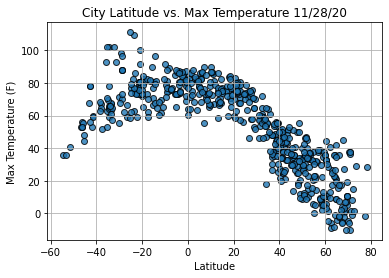

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

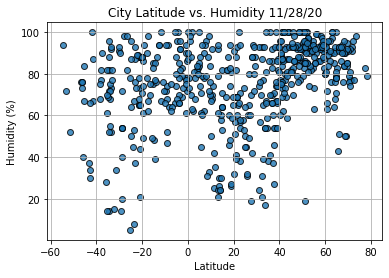

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

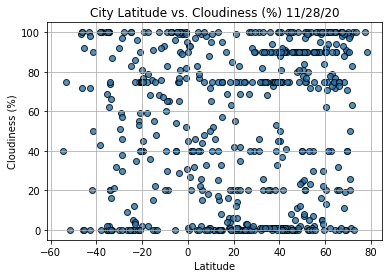

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

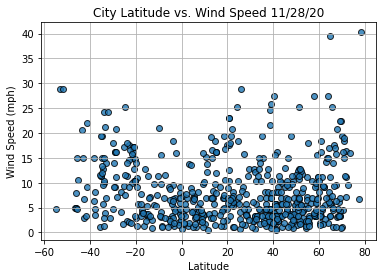

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title + time.strftime("%x"))
    plt.show()   
    

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

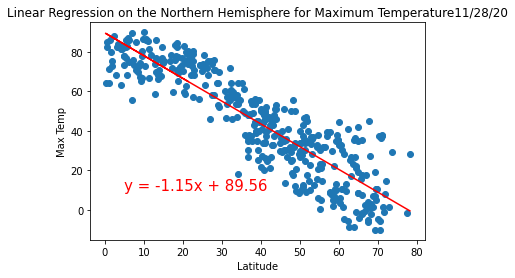

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,10))

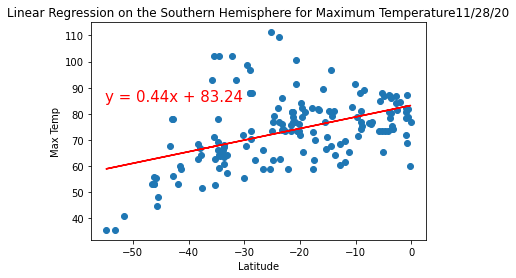

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,85))

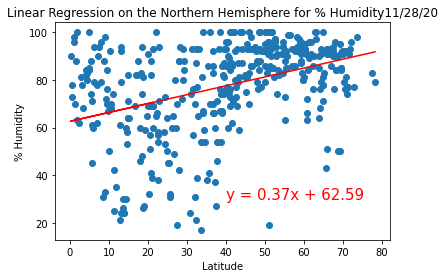

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,30))

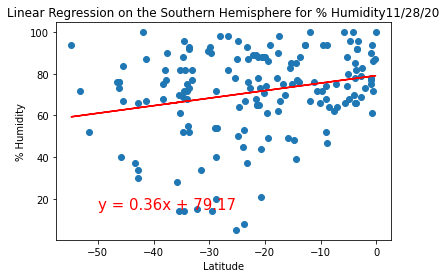

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

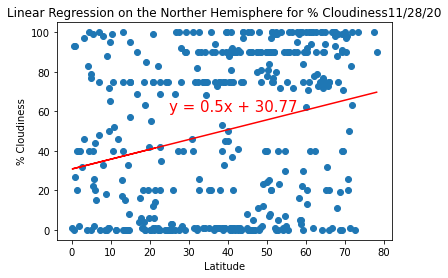

In [49]:
# Linear regression on the Norther Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Norther Hemisphere for % Cloudiness', '% Cloudiness',(25,60))

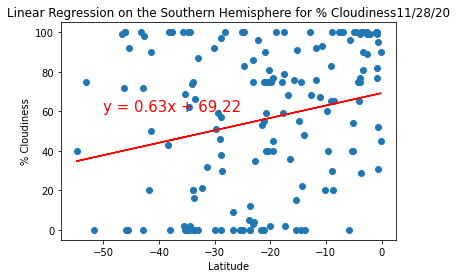

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

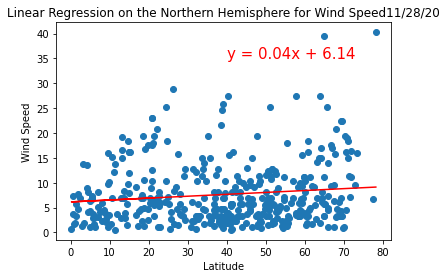

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

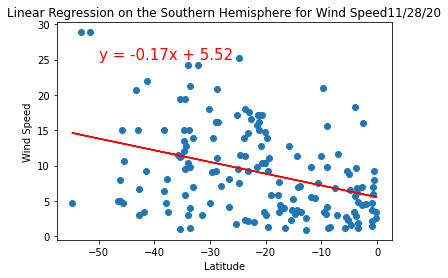

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))